In [1]:
import os
import sys
import pandas as pd
lib_dir = os.path.realpath('../../../lib/')
if lib_dir not in sys.path: sys.path.append(lib_dir)

In [2]:
import util.geo

In [3]:
EVENTS_RAW_DATA = '../../../working/metrics/partner-events/events.csv'
DATA_DIR = '../../../data/metrics/events/partner-events/'
EVENTS_DATA = os.path.join(DATA_DIR, 'events.csv')

In [4]:
columns = {
    'Event Name': 'name',
    'Event Start Date': 'start_date',
    'Event End Date': 'end_date',
    'Partner/Promote': 'partner_promote',
    'Stage': 'stage',
    'Live date': 'live_date',
    'Venue postcode': 'postcode',
    'Pricing Policy': 'pricing',
    'Venue - including address': 'venue',
    'Is this event on Leeds Inspried?': 'on_leeds_inspired',
}

Load the data and rename columns. Parse the dates to dates.

In [5]:
data = pd.read_csv(EVENTS_RAW_DATA)[columns.keys()].rename(columns=columns)
data.start_date = pd.to_datetime(data.start_date, errors='coerce')
data.end_date = pd.to_datetime(data.end_date, errors='coerce')

Filter data by not LI Pull through and start date before now

In [6]:
data = data[
    # (data.live_date == 'This event is live ') &
    ((data.stage != 'LI pull through') & data.stage.notna()) &
    (data.start_date < pd.Timestamp.now())
]

In [7]:
data['ward_code'] = data.postcode.pipe(util.geo.postcode_formatter).map(util.geo.postcode_to_ward_code)
data['ward_name'] = data.ward_code.pipe(util.geo.ward_code_to_name)

Save the file

In [8]:
data[
    ['name','start_date','end_date','ward_code']
].to_csv(EVENTS_DATA, index=False)

Print out missing postcode data

In [9]:
data[data.postcode.isna()][[
    'name', 'start_date'
]]

,name,start_date
1,"East Street Arts, A City Less Grey 2022",2022-10-08
3,Phoenix Dance Theatre Virtual Gallery,2023-01-01
4,"The Big Art Giveaway, School of Creative Arts ...",2023-01-01
5,"Embassy of Netherlands, Meet Leeds Lab",2023-01-16
6,Shifting Borders: A Journey to the Centre of o...,2023-01-24
...,...,...
296,Leeds Language Week: Sentidos y Sensaciones (S...,2023-11-16
297,Leeds Language Week: Where Will Languages Take...,2023-11-16
298,afrah shafiq: st.itch,2023-11-16
299,Leeds Language Week: Chinese Dance and Languag...,2023-11-19


Plot the pricing

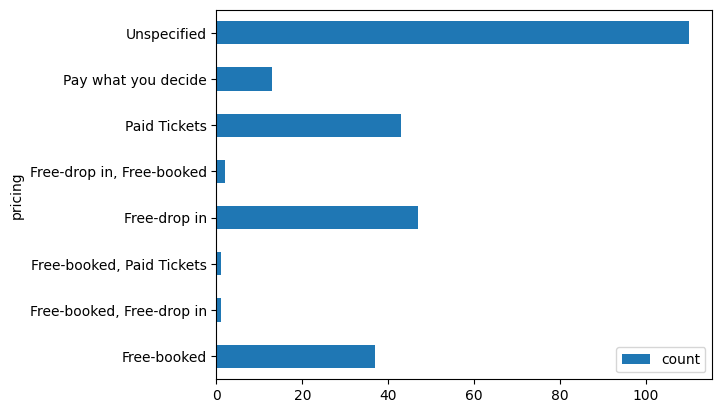

In [10]:
# .groupby('pricing').count().plot.barh()
pricing = data.pricing.fillna('Unspecified').str.replace('[\[\'\]]', '', regex=True).to_frame().reset_index().groupby('pricing').count()

pricing.columns = ['count']
plot = pricing.plot.barh()
